<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-high-level-introduction-to-neural-networks-and-deep-learning" data-toc-modified-id="A-high-level-introduction-to-neural-networks-and-deep-learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A high level introduction to neural networks and deep learning</a></span><ul class="toc-item"><li><span><a href="#Installing-TensorFlow" data-toc-modified-id="Installing-TensorFlow-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing TensorFlow</a></span></li></ul></li><li><span><a href="#Building-a-simple-image-classifier" data-toc-modified-id="Building-a-simple-image-classifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building a simple image classifier</a></span><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Building-a-neural-network" data-toc-modified-id="Building-a-neural-network-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Building a neural network</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Evaluating-model-performance-and-making-predictions" data-toc-modified-id="Evaluating-model-performance-and-making-predictions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Evaluating model performance and making predictions</a></span></li><li><span><a href="#Saving-and-loading-models" data-toc-modified-id="Saving-and-loading-models-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Saving and loading models</a></span></li><li><span><a href="#Neural-Network-Hyperparameters" data-toc-modified-id="Neural-Network-Hyperparameters-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Neural Network Hyperparameters</a></span></li></ul></li><li><span><a href="#Building-a-more-complicated-image-classifier" data-toc-modified-id="Building-a-more-complicated-image-classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a more complicated image classifier</a></span><ul class="toc-item"><li><span><a href="#Building-an-image-classifier-using-the-fashion-MNIST-dataset" data-toc-modified-id="Building-an-image-classifier-using-the-fashion-MNIST-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Building an image classifier using the fashion MNIST dataset</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></div>

# A high level introduction to neural networks and deep learning

We just went through [some slides]() that briefly covered an introduction to neural networks. Lets walk through this notebook which will cover a how to build and train neural networks using Keras and Tensorflow. 

**Goals of this notebook:**
1. Install tensorflow
2. Familiarize yourself with tensorflow and keras. 
3. Build your first neural network 
4. Evaluate your model and make decisions on hyperparamters surrounding your model

## Installing TensorFlow

To install tensorflow on your laptop simply run the following line in your command line or terminal:  

`pip install tensorflow`  
  
**Note:** The pip install method by the tensorflow team is recommended even if you have conda installed. If you have a GPU on your device and are installing tensorflow you will need to install a different version.

Once you have tensorflow installed (or if you already had it installed) lets import tensorflow and keras and check their versions.

In [1]:
import tensorflow as tf # Note that tf is the standard way to import tensorflow, much like pd is to pandas
from tensorflow import keras

In [2]:
# Check tensorflow version
tf.__version__

'2.2.0'

In [3]:
# Check Keras version
keras.__version__

'2.3.0-tf'

The '-tf' at the end of the keras version just indicated that tf.keras implements the keras API.

If your versions of either tf or keras are not at least version 2.0, I recommend updating them before continuing through this notebook. You can update tensorflow by running the following code in your terminal:
  
`pip install --upgrade tensorflow`  
  
At this point we should discuss what tensorflow and keras actually are.  
  
Keras is a high-level deep learning API that allows you to easily build, train and evaluate neural networks. You can learn a lot more about keras by reading its documentation [here](keras.io). Keras is only an API by which to more easily manipulate, build and interact with neural networks. Keras requires a deep learning library back end to actually be used. The deep learning library is doing the heavy lifting. Keras is just making it easier to interact with that deep learning library. Keas can be implemented with many deep learning libraries including TensorFlow, Microsoft Cognitive Toolkit (CNTK) and Theano. Google's TensorFlow is the most popular deep learning library. The second most popular that you will hear about is Facebook's PyTorch. PyTorch's API is very similar to Keras.

# Building a simple image classifier

We are going to work with one of the classic datasets of machine learning and deep learning. It is called the MNIST handwritten digits dataset. This dataset comes along with the Keras and is considered the 'hello world' of neural networks because it is used in tutorials like this one so frequently (similar to how the UCI iris dataset is used for sklearn tutorials). The MNIST dataset consists of 70,000 images of handwritten digits. Each image is 28 pixels by 28 pixels and is in grayscale. Here is an example of what the digits look like.
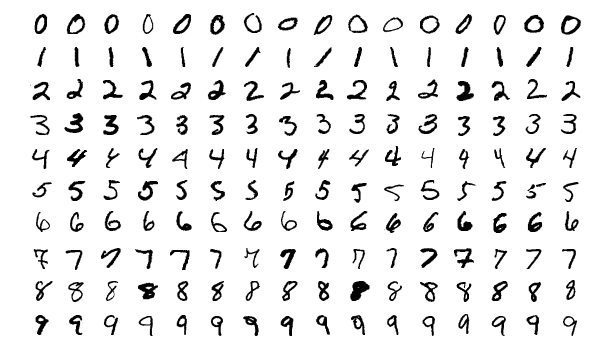

As you can see the digits are not all exactly the same (because they are handwritten), but you as a human can tell them apart (for the most part). The actual data here is a bit simpler than these images because it just contains the intensity of signal at each pixel (remember it is grayscale).

## Importing the data

The data set is really commonly used so we can actually import it directly from keras. Lets get to it.

In [4]:
# Import the dataset
mnist = keras.datasets.mnist

# The dataset is already split into test and train sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Lets look a little closer at the dataset!

In [5]:
# Check the shape of the dataset
X_train.shape

(60000, 28, 28)

In [6]:
# Check the type of data in the dataset
X_train.dtype

dtype('uint8')

So our dataset is three dimensional (28 arrays that each contain 28 values for each image) and each data point is an integer. The data is integers because it's a grayscale image and the integer value represents the pixel intensity at that position. Here is a close up of one 28X28 pixel image from the data set. As you can see the intensity of the signal (amount of black on the white background) varies across the image.

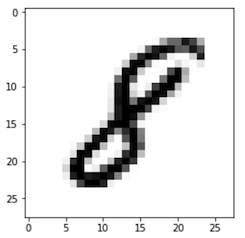

This data set does not have a validation set so lets make one now, by keeping the first 5,000 instances as our validation set. Let's also scale the data. Typically the input values for neural nets range from 0 to 1. Since the data is 'uint8' type we can just divide by 255 (The maximum value). This is equivalent to using the sklearn min max scaler. 

In [7]:
X_valid, X_train = X_train[:5000]/255, X_train[5000:]/255
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

Our labels in this case are the numbers written in each image. 


## Building a neural network

Let's build a neural network! There are a couple things we need to keep in mind when we build this neural network:
  
**Input:**
+ The input layer in our case will have one neuron per pixel in the input image. 
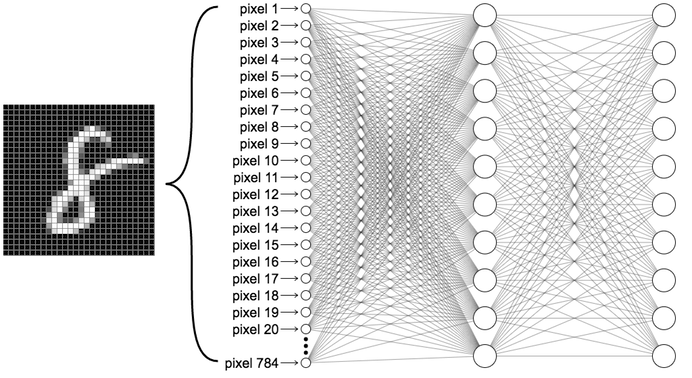
+ The input layer will also have a "flat" shape, meaning is will not be two dimensional, which is the format our data is currently in. 
+ The input layer does not have an activation function. This layer is just to feed your data into the first hidden layer.
  

**Neural Network Architecture and hidden layers:**
+ We will be building one of the simplest neural network architectures here. This architecture is called a multi-layer perceptron (MLP). 
+ MLPs have every node in the input layer connected to every node in the first hidden layer. Every node in the first hidden layer is also connected to every node in the next hidden layer and so on. See below for an image of this.
+ MLPs are feedforward neural networks, meaning the nodes in the first hidden layer only feed data into the second hidden layer, but the second hidden layer does not feed data into the first hidden layer. 
+ Each hidden layer had an extra bias node added by default by keras. This is a standard feature of MLPs. The bias node does not take any input from the previous layer, but does input something into the next layer. 
+ We are choosing a somewhat arbitrary architecture here. We will have two hidden layers. The first hidden layer has 300 nodes and the second has 100. This is mostly to keep the size manageable, but theoretically you could have many more nodes in each hidden layer and many more hidden layers.
+ We will use the rectified linear unit, or 'relu', activation function for all the nodes in our hidden layers. This is an arbitrary choice in this case, but relu is not as computationally intensive as some other activation functions, but also is more complex than a linear activation function. A neural network with only linear activation function would only be able to model linear relationships, which wouldn't make it very useful. There now other activation functions that are more commonly used, but they are variations of relu, such as elu or selu. 
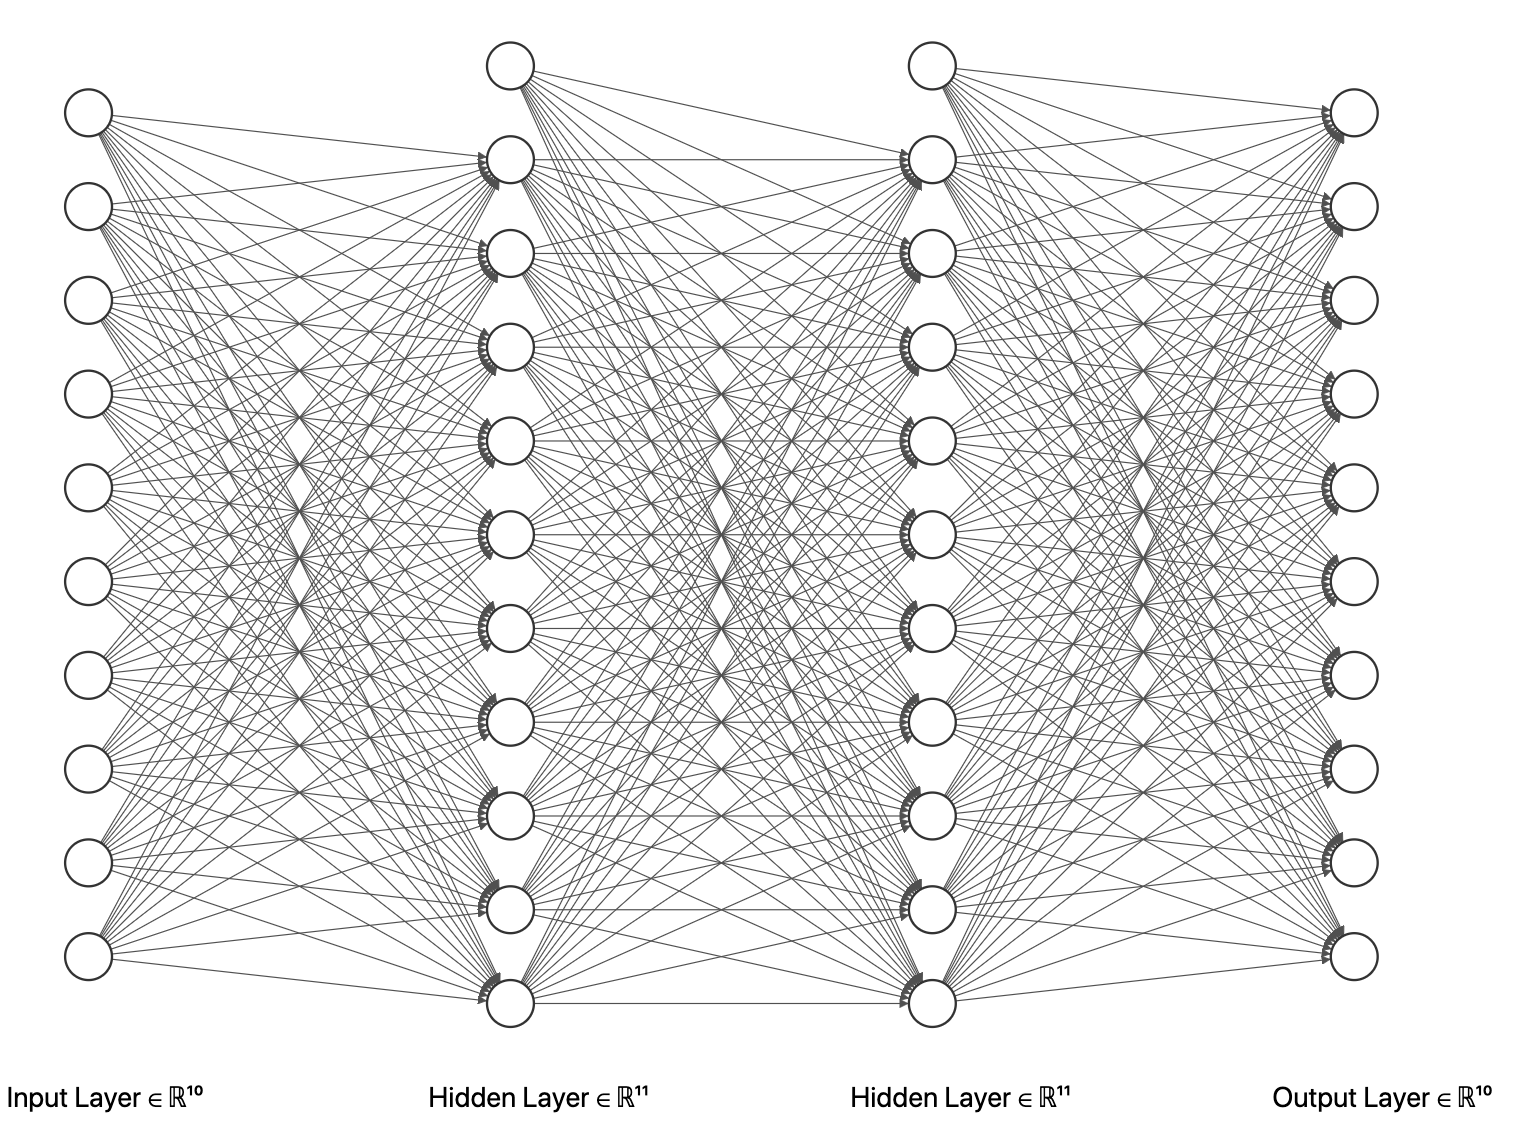
*This image is a simple representation of our neural network. In reality we have 784 input neurons, 300 neurons in the first hidden layer and 100 neurons in the second hidden layer.*
  
**Output:**
+ This is a multiclass (more than 2) classification problem. We have 10 digits that each image could be labeled as [0,1,2,3,4,5,6,7,8,9] so we will need 10 neurons in the output layer. 
+ Each output neuron will give a number proportional to the probability of the label that each neuron is predicting. 
+ To give a more interpretable number from each neuron in the output layer will have the softmax activation function. The softmax activation function guarantees that all the probabilities will be between 0 and 1 and that all the probabilities (from all 10 neurons) add up to 1.

In [1]:
X_val.shape

NameError: name 'X_val' is not defined

In [12]:
# The code to build the neural network architecture. 

# We will use the Keras sequential API to build the neural network one layer at a time
NN = keras.models.Sequential()

# Next add an input layer
# '.Flatten' tells keras to reshape the data with this layer and not transform the inputs
# We specified the input shape as [28,28] since that is the dimensions of our input arrays
NN.add(keras.layers.Flatten(input_shape=[28,28]))

# Make the hidden layers
# The '.Dense' part just tells keras/tensorflow that this is just a regular densely connected layer.
NN.add(keras.layers.Dense(300, activation='relu'))
NN.add(keras.layers.Dense(100, activation='relu'))

# Lastly add the output layer
# Remember to specify the softmax activation function
NN.add(keras.layers.Dense(10, activation='softmax'))

We could easily create a sequential model by also passing in each layer in a list like this:
  
`NN= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])`

Lets check out what our neural network architecture looks like.

In [13]:
NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
# How are number of parameters determined? Look at this quotient
235500/300

785.0

This looks like the number of input layers plus the bias node.

In [16]:
# Next layer
30100/100

301.0

This looks like the number of nodes in the previous layer plus the bias node.

The `.summary()` method shows all of the layers in the model, including the layer's name (automatically generated), its output shape (None, just means that batch size can be anything) and the number of parameters.

The input layer always has 0 parameters by definition. The total parameters in our model is 266,610! Wow how did we get so many! Well these parameters are what is being trained when we start to train our model. The parameters are the weights between each connection between nodes, and the bias term attached to each node. Just from the connections between the input layer and the first hidden layer there are 784x300 connection weights and 300 bias terms (one for each node). 

We can get all the weight and bias terms by calling the `.get_weights()` method. Let's get the weights and biases attached to the first hidden layer. 

In [17]:
# look at first layer as object
NN.layers[0]

In [18]:
# Here we can get a list of the layers in our model, by calling .layers
# This first hidden layer is at index 1
# .get_weights() returns two arrays. The first array will contain 784 arrays of size 300 
# which has all weights for connections between the input and first hidden layer
weights, biases = NN.layers[1].get_weights()

# Lets take a look at the weights
weights

array([[ 0.05979201,  0.04115484, -0.04461932, ...,  0.0551099 ,
        -0.054845  , -0.04894698],
       [ 0.05845246,  0.06465977, -0.0322532 , ...,  0.06035498,
         0.00658529,  0.05728489],
       [-0.0142744 ,  0.030685  , -0.04701303, ..., -0.01245825,
         0.05967045,  0.0506282 ],
       ...,
       [-0.05816563, -0.01798764, -0.05557795, ...,  0.04860635,
         0.00830882,  0.00576331],
       [ 0.03147662,  0.07410333, -0.00854362, ...,  0.06920323,
         0.06999753,  0.00251528],
       [-0.01940055, -0.03155765, -0.05154008, ...,  0.06809089,
        -0.00249144,  0.06868288]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
# Now lets look at the biases 
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

The weights for the connections to dense layers are randomly assigned before training. This is important because if they all start with the same value it is unlikely they would diverge during training and you would actually be able to capture more information by having more nodes.

The bias terms on the other hand are initialized to zero by default, which is just fine for our purposes. 

After the model architecture is created you must compile the model, which is where you can specify the loss function, optimizer and metric to use while training the model.

In [25]:
NN.compile(loss = 'sparse_categorical_crossentropy', # This is explained much more below
          optimizer = 'sgd', # sgd stands for stochastic gradient descent
          metrics = ['accuracy']) # These are other metrics you would like to calculate after each epoch

There is a lot to talk about for each of these compile parameters, and much of it is beyond the scope of this high level introduction, but here is a brief explanation of each parameter.

A loss function determines how the model evaluates its performance. The 'sparse_categorical_crossentropy' indicates the target classes (0 to 9) are exclusive and being labeled 3, means the same instance can not also be labeled 8. There are lots of loss function options in keras, read more about them [here](keras.io/losses).

The optimizer indicates how we change the model (or how changes to weights and biases are calculated during training). Stochastic gradient descent is a common method, which I encourage you to look up if you are not already familiar. I found [this video](https://www.youtube.com/watch?v=sDv4f4s2SB8) and [this video](https://www.youtube.com/watch?v=vMh0zPT0tLI) to be really helpful to understand what this was. *Questions about gradient descent and stochastic gradient descent are really common during interviews!* 
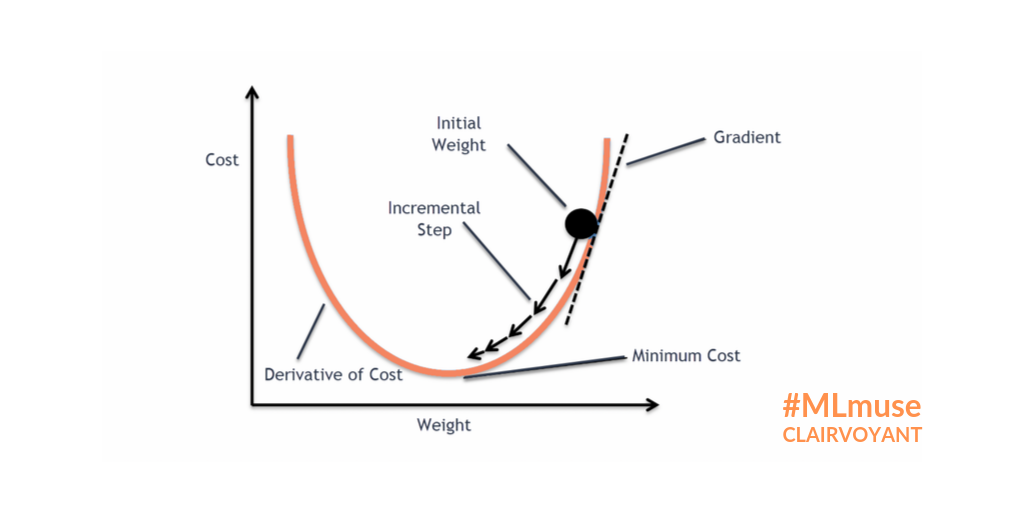

Finally the accuracy metric is a really understandable metric for classification problems.

## Training the model

Like Sklearn, training a model using the keras API is a bit underwhelming. It is done by calling the `.fit()` method.

When training the model we will need to specify the number of epochs. 1 epoch just means the model trained on the entire dataset once. Many neural networks are trained for hundreds or even thousands of epochs, which is yet another reason they can be computationally expensive to train. Here we make the arbitrary decision to train for 30 epochs, mostly so training doesn't take forever.

After each epoch keras measures the loss function, and any other metrics we specified. We can also pass a validation set and keras will measure those metrics on the validation set as well.

In [26]:
history = NN.fit(X_train, y_train, epochs = 30,
                 validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3338 - accuracy: 0.9050 - val_loss: 0.2715 - val_accuracy: 0.9244
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2608 - accuracy: 0.9252 - val_loss: 0.2232 - val_accuracy: 0.9376
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2201 - accuracy: 0.9371 - val_loss: 0.1931 - val_accuracy: 0.9458
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1902 - accuracy: 0.9462 - val_loss: 0.1715 - val_accuracy: 0.9522
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1676 - accuracy: 0.9524 - val_loss: 0.1576 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1490 - accuracy: 0.9573 - val_loss: 0.1414 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1339 - accuracy: 0.9624 - val_loss: 0.1300 - val_accuracy:

There we have it! You just trained your first neural network (maybe not your first?). 

Our validation accuracy is 98.10% and our model is just slightly overfit. 

The `.fit()` method returns a history object containing the training parameters in in history.params, the list of epochs in history.epochs, and most importantly a dictionary of loss and other metrics calculated at the end of each epoch in history.history.

Let's use the history.history dictionary to plot a learning curve.

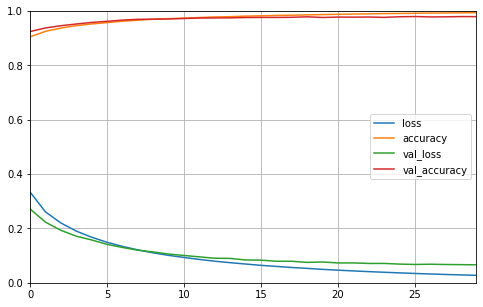

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show();

You can see that the training and validation accuracy increase during training and the training and validation loss decrease. You can also see that the validation loss doesn't really decrease much after epoch 12, so we could have stopped training the model a lot earlier!

## Evaluating model performance and making predictions

At this point, if this was a real project you should try tweaking a bunch of hyperparameters and see if you can make your model better! I happen to know we can actually get a similarly performing model using K nearest neighbor classification on this dataset so I can only assume its possible to get an even better performing model, by taking some extra steps to tune hyper parameters or do some data augmentation, but again that is beyond the scope of this notebook. We will talk about hyper-parameter tuning a little bit more towards the end of this notebook. 

For now lets get the final performance of this model on the test set.

In [28]:
NN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.9780 - accuracy: 0.9740


[13.977981567382812, 0.9739999771118164]

The performance on the test set is similar to the validation, which is great!

Let us use our model to make some predictions. Since we don't actually have more data to make predictions on, let's just use three instances of the test set.

In [29]:
New_data = X_test[8:11]
New_data_predictions = NN.predict(New_data)
New_data_predictions.round(12)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In this case it is predicted with nearly 100% probability for each prediction it is making, but if we search hard enough we will find some cases where a there is a small degree of ambiguity. Knowing how this model is working (and the data that goes into it), its no surprise that there is some ambiguity between classes for example 5, 6 and 8. 

Another useful tool for visualizing your models performance during training and reviewing the architecture and parameter weights is tensorboard, a tool built by the tensorflow team. If you want to learn more [click here](https://www.tensorflow.org/tensorboard). 
  
  
## Saving and loading models

You can imagine that many neural networks, especially those with many hidden layers and connections, could take a long time to train (on the order of days or even weeks). It would be a shame to have to retrain such a model everytime you needed it. You have probably already saved your model during your Insight project. Maybe in a pickle file?

Keras has a built in way to save models and load models so let's briefly discuss that. You can save a model by calling the `.save()` method, and load a model using the `.load_model()` method. This can be used to save your model in HDF5 format which saves the models architecture, hyperparameters, and all of the trained model parameters. 

In [30]:
# Save a model
NN.save('My_first_NN.h5')
# Load a model
NN = keras.models.load_model('My_first_NN.h5')

You can also save your model while training it using the `callbacks` within the parameter `.fit()` method.

## Neural Network Hyperparameters

The fact that neural networks are so flexible, is also why it is so hard to tune all of the hyperparameters associated with the model. The architecture of the neural network can of course be manipulated in a variety of ways, but this also means it is very hard to tweak a model so that it has the best possible combination of hyperparamters. There is too much to discuss on this topic so let's briefly go over some of the most important hyperparamters. 

Number of hidden layers and number of neurons per hidden layer:
+ There is no hard and fast rule about the number of hidden layers or number of nodes in each layer
+ Theoretically all problems could be solved with just one hidden layer, if there are enough nodes in that layer.
+ Deep networks (more layers rather than more neurons in a single layer) are generally preferred to shallow networks since they have a better parameter efficiency.
+ In practice it is actually a lot easier to pick a model with many more nodes and hidden layers than you actually need and stop training early to prevent overfitting.

Learning Rate:
+ If your learning rate is too small your model will take a long time to train.
+ If your learning rate is too large, the model loss will jump up and down and it's possible you will miss a local (or global) minimum.
+ If you plot loss compared to various learning rates you can see the loss decreasing as your learning rate increases, until a point where loss will shoot back up. You should choose a learning rate smaller than the smallest loss function on this graph.
+ The optimal learning rate is highly dependent on the other hyperparameters like batch size, so it's recommended to update the learning rate after changing any other hyperparamters. 

Batch size:
+ Batch size refers to the number of instances the network is training on at a time, since it is unlikely the entire training set will fit into the device's memory at once.
+ There is not a consensus on whether a small or large batch size is better
+ In general, larger batch sizes lead to faster training, but if you notice your training loss is unstable during training, you should lower the batch size. 

Other hyperparameters to consider:
+ Activation Function: We used relu, but there are a lot of options to consider. Relu is usually a good default for the hidden layers, but the activation function for the output layer really depends on your task. 
+ Optimizer. We used stochastic gradient descent, but there are many other options
+ The actual architecture of the model. We used a multi-layer perceptron, but there are many many many more neural network architectures. Some of these are already known to be particularly good at certain tasks (i.e. convolutional neural networks (CNNs) are considered to be the best for computer vision tasks).
+ The number of iterations: You don't actually need to tweak this, just stop training the model early to prevent overfitting.

# Building a more complicated image classifier

We just built a simple image classifier together. Now its your turn!

Here is a short "assignment" (I won't actually check if you did this).


## Building an image classifier using the fashion MNIST dataset

Lets work with a slightly more complex example than the one we just went through. We will build an image classifier to recognize 10 classes (just like above), but instead of digits, you will work with clothing items and accessories from the [fashion MNIST](https://www.tensorflow.org/tutorials/keras/classification) data set. Here is the assignment:

1. Import the [fashion MNIST dataset](https://www.tensorflow.org/tutorials/keras/classification). Keep a small validation dataset (~5000 images)
2. Build and train a model with 3 hidden layers with 300, 200 and 100 nodes. Check the performance on the validation set.
3. Repeat step 2 on and train two more models, but change at least one hyper parameter each time Try different activation functions, try more or less layers, try a different number of nodes, try changing the batch size and learning rates.
4. Read about [Batch Normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) if you are not already familiar with it. Recreate your best model from step 4 with batch normalization layers and train your model.
5. Read about [dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) if you don't already know about it. Recreate your best model so far with a 40% drop out rate in each layer.
6. Try your best model(s) on the test set.


## Conclusions

There is a lot to learn while studying neural networks, but hopefully this gives you enough information to get started and decide which areas you want to focus on, or if you want to focus on neural networks at all.

Happy Studying!